<h1 style="color: #00BFFF;">00 |</h1>

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import os # file managment
import matplotlib.pyplot as plt # 2D visualizations
import seaborn as sns # high-resolution visualization
import warnings # warning messages management
import datetime # to play with dates

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

In [9]:
def explore_data(data): # sum & returns duplicates, NaN & empty spaces
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    import pandas as pd
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    return exploration

def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [3]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/03. Projects/05_patern_pending/00_data", "cleaned.csv")
cleaned = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column
cleaned = cleaned.reset_index()

<h1 style="color: #00BFFF;">03 | EDA</h1>

In [4]:
# Quick exploration
cleaned.describe()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,year,month,day,house_lifetime
count,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,10798.000000,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1986.620318,12758.283512,5.402966e+05,2014.322962,6.573969,15.687457,49.617678
std,6234.661218,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,685.230472,27274.441950,3.673681e+05,0.467619,3.115061,8.634890,28.808668
min,0.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000,7.800000e+04,2014.000000,1.000000,1.000000,8.000000
25%,5399.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000,3.220000e+05,2014.000000,4.000000,8.000000,24.000000
50%,10798.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000,4.500000e+05,2014.000000,6.000000,16.000000,46.000000
75%,16197.000000,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000,6.450000e+05,2015.000000,9.000000,23.000000,69.000000
max,21596.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000,7.700000e+06,2015.000000,12.000000,31.000000,123.000000


<h2 style="color: #008080;">Dealing with Duplicates</h2>

In [6]:
explore_data(cleaned)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
index,0,0
date,0,0
bedrooms,0,0
bathrooms,0,0
sqft_living,0,0
sqft_lot,0,0
floors,0,0
waterfront,0,0
view,0,0
condition,0,0


In [7]:
# So, nothing to do here, moving on!

<h2 style="color: #008080;">Dealing with Outliers</h2>

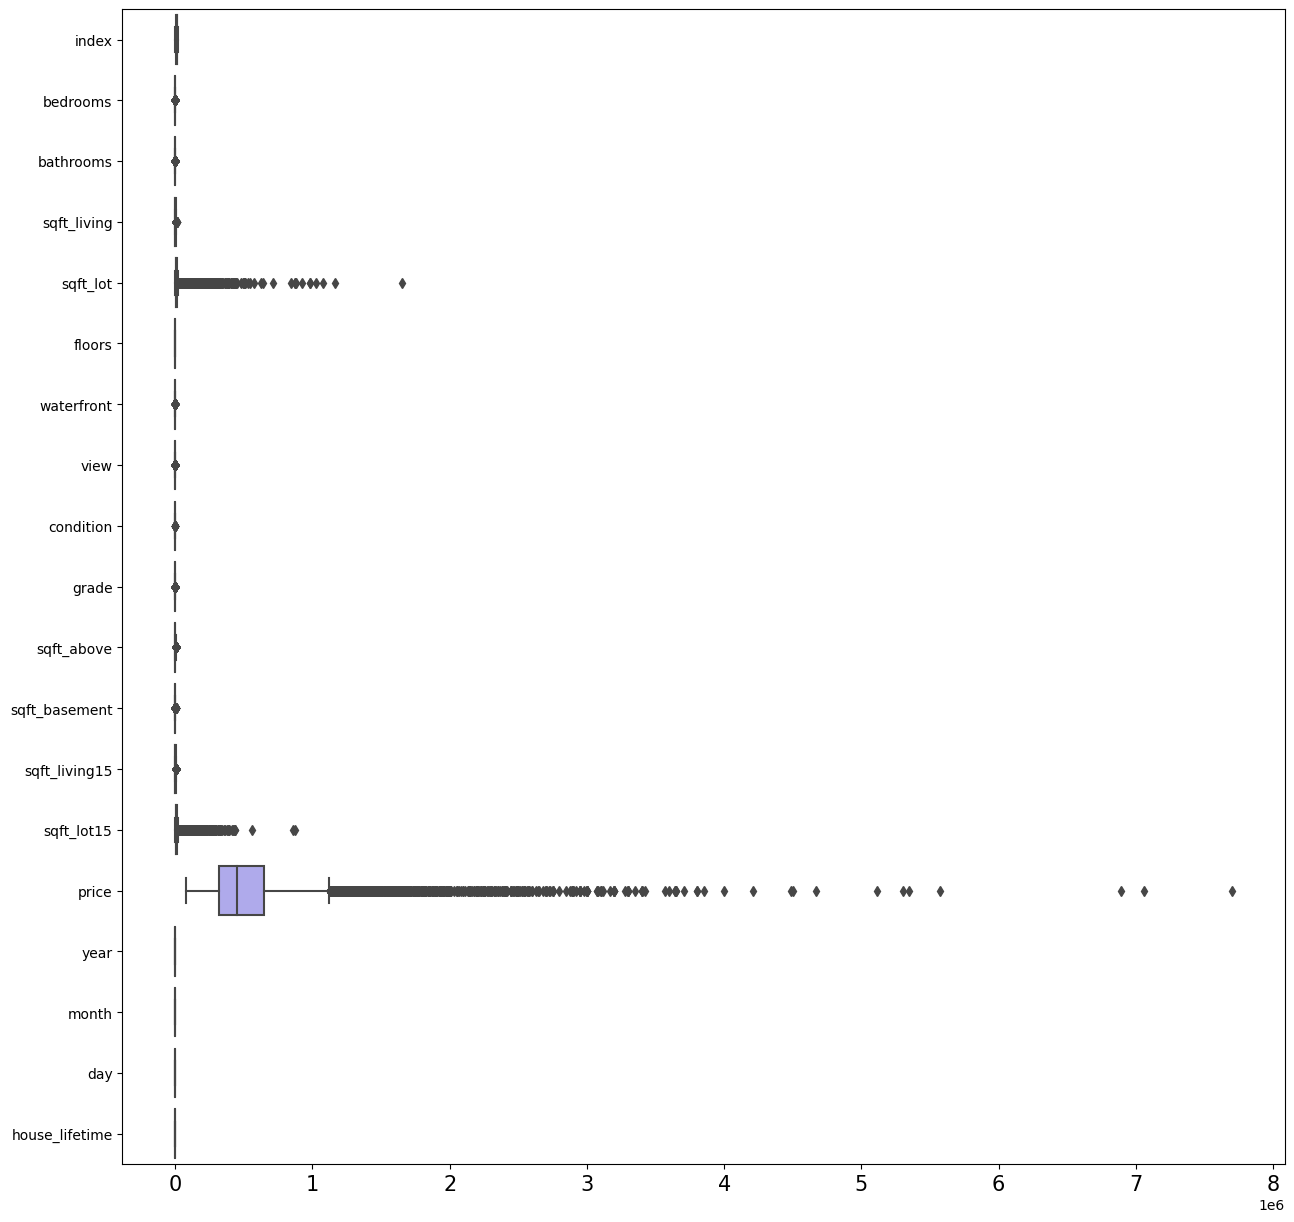

In [8]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

In [10]:
outlier_slayer(cleaned)

,index,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,year,month,day,house_lifetime
0,0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,221900,2014,10,13,68
1,1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,538000,2014,12,9,32
2,2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,180000,2015,2,25,90
3,3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,604000,2014,12,9,58
4,4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,510000,2015,2,18,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,1530,1509,360000,2014,5,21,14
21593,21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,1830,7200,400000,2015,2,23,9
21594,21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,1020,2007,402101,2014,6,23,14
21595,21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,1410,1287,400000,2015,1,16,19


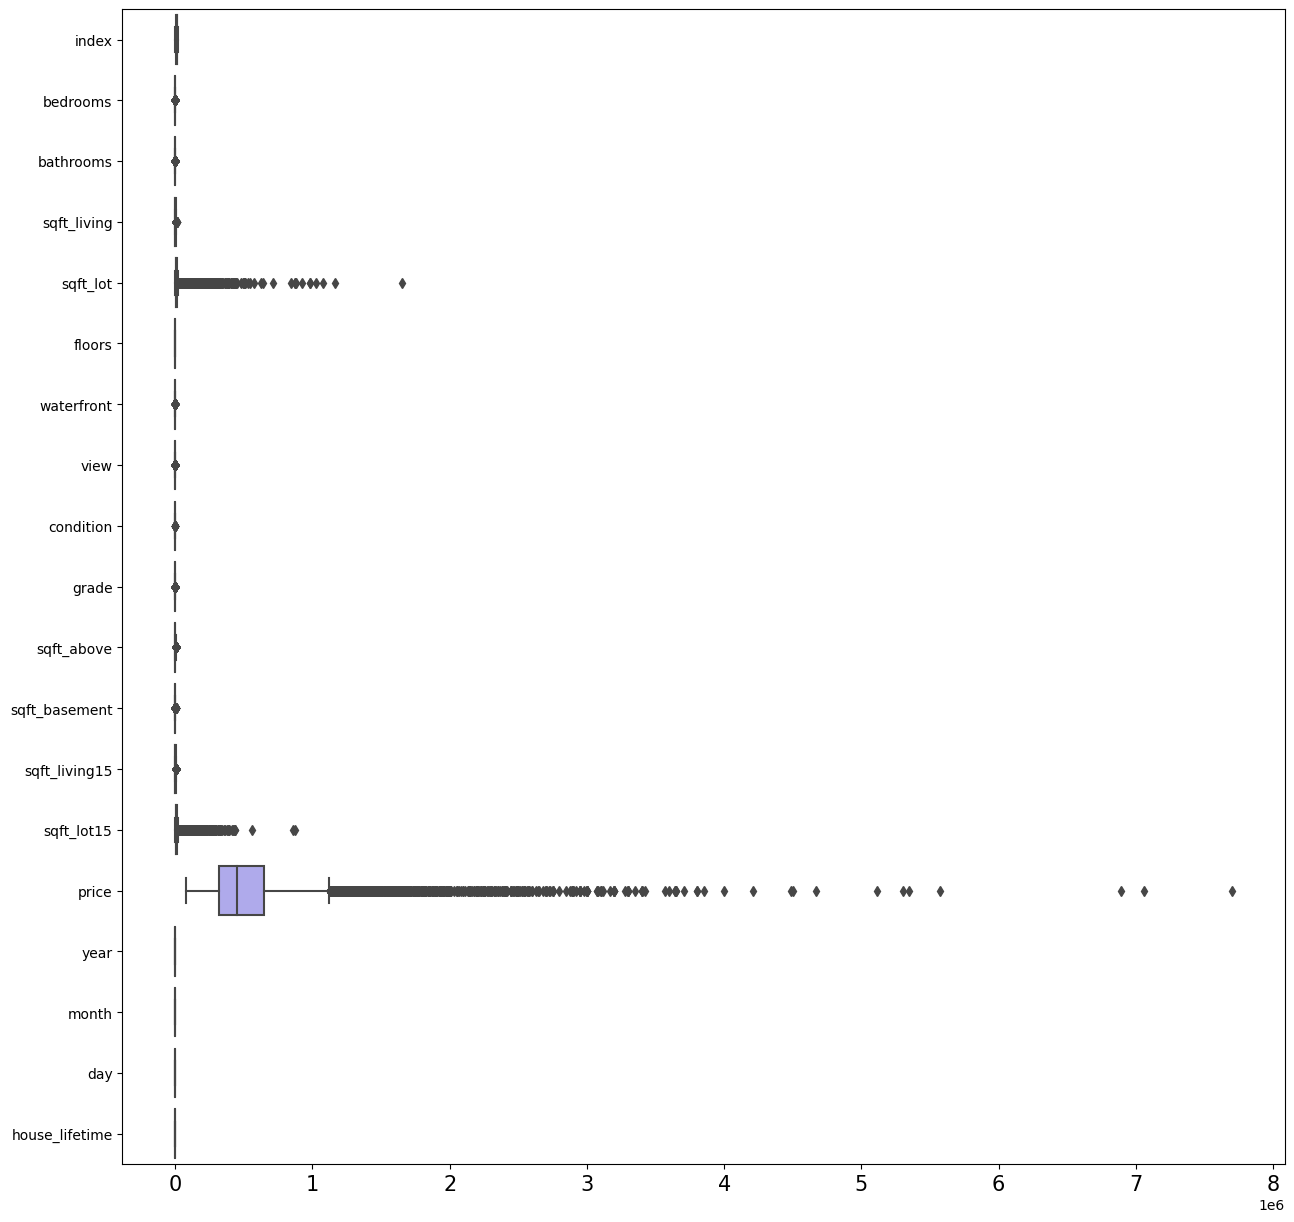

In [11]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=cleaned, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

<h2 style="color: #008080;">Dealing with Skewness</h2>

<h2 style="color: #008080;">Dealing with Data distributions</h2>

<h2 style="color: #008080;">Dealing with Multicollinearity</h2>